In [1]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv",encoding="ISO-8859-1")

Let's take a look at some basic information about this data.

In [2]:
print(star_wars.columns)
print(star_wars.shape)
print(star_wars.head(5))

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

# Converting Movie Columns to Readable Format

Let's convert question columns that return "Yes" or "No" reponses to Boolean values so they're easier to analyze.

Let's also convert the columns names for each movie to a more intuitive title.  They will follow the format "seen_1" if the respondent has seen episode 1, "seen_2" if the respondent has seen episode 2, and so on.

In [4]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)


In [5]:
print(star_wars.iloc[:,3:9].head(1))

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
1  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
1  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  
1  Star Wars: Episode VI Return of the Jedi  


In [6]:
to_boolean = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    "NaN": False
}

for column in star_wars.columns[3:9]:
    star_wars[column] = star_wars[column].map(to_boolean)

In [7]:
print(star_wars.iloc[:,3:9].head(1))

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1                                               True                                    

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
1       True       True       True       True       True  


In [8]:
rename_dict = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}

star_wars = star_wars.rename(columns = rename_dict)

In [9]:
print(star_wars.iloc[:,3:9].head(1))

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6
1   True   True   True   True   True   True


# Cleaning Up Ranking Columns

Let's change the ranking columns data to numeric values, and rename the columns more intuitively like we did for the "seen" columns.

In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [11]:
print(star_wars.iloc[:,9:15].head(2))

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                3.0                                                                                               
2                                                NaN                                                                                               

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  
1          2.0          1.0          4.0          5.0          6.0  
2          NaN          NaN          NaN          NaN          NaN  


In [12]:
rename_ranks = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}

star_wars = star_wars.rename(columns = rename_ranks)
print(star_wars.iloc[:,9:15].head(2))


   ranking_1  ranking_2  ranking_3  ranking_4  ranking_5  ranking_6
1        3.0        2.0        1.0        4.0        5.0        6.0
2        NaN        NaN        NaN        NaN        NaN        NaN


# Finding The Highest Ranked Movie

Let's take the means of all of the ranking columns to see which movie has the best ranking.  Given the methodology of the rankings, lower values correspond to more highly ranked movies.

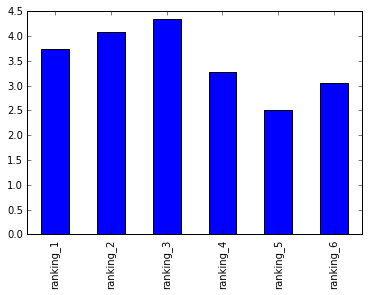

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

means = star_wars.iloc[:,9:15].mean()
means.plot.bar()



Unsurprisingly, Episode 5, The Empire Strikes Back, is the favorite of the bunch.  The newer trilogy was received very poorly by critics, and we can see that reflected in their rankings.  All of the OT movies are ranked more favorable than all of the NT movies.

In [14]:
seen_list = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]

seen_counts = {}
for column in seen_list:
    count = star_wars[column].sum()
    seen_counts[column] = count

print(seen_counts)

{'seen_1': 673, 'seen_6': 738, 'seen_2': 571, 'seen_3': 550, 'seen_4': 607, 'seen_5': 758}


([<matplotlib.axis.XTick at 0x7fb72e9662e8>,
 <a list of 6 Text xticklabel objects>)

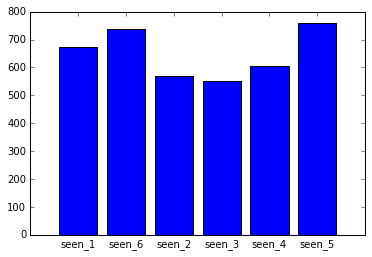

In [15]:
plt.bar(range(len(seen_counts)), seen_counts.values(), align='center')
plt.xticks(range(len(seen_counts)), seen_counts.keys())



Despite being less well critically received, and being less well favored by respondents, the last 2 films of the new trilogy are the most viewed.  This may be due to rising popularity of the series in the culture consciousness.

# Exploring data by Star Trek Fandom

In [17]:
star_trek_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
not_star_trek_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

print(len(star_trek_fans))
print(len(not_star_trek_fans))

427
641


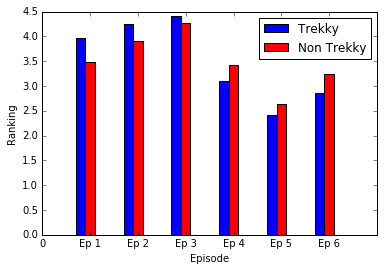

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

st_means = star_trek_fans.iloc[:,9:15].mean().tolist()
nst_means = not_star_trek_fans.iloc[:,9:15].mean().tolist()
x = np.arange(6)

ax = plt.subplot(111)
ax.bar(x-0.2, st_means,width=0.2,color='b',align='center',label="Trekky")
ax.bar(x, nst_means,width=0.2,color='r',align='center',label="Non Trekky")
ax.set_xlabel("Episode")
ax.set_ylabel("Ranking")
ax.legend()
ax.set_xticklabels((0,'Ep 1', 'Ep 2', 'Ep 3', 'Ep 4', 'Ep 5', "Ep 6"))

plt.show()


There's a pretty clear distinction between trekkies and non-trekkies with regard to the OT and NT.  